In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
%matplotlib inline

# Load Data

In [3]:
#Convert date
def to_strftime(df):
    date = datetime.strptime(df, '%b %d, %Y')
    return date.strftime("%Y-%m-%d")

In [4]:
df = pd.read_csv('./data/AAPL Historical Data.csv', sep=',')
df['Date'] = df['Date'].apply(lambda x: to_strftime(x))
df = df.sort_values('Date').reset_index(drop=True)

df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2012-02-27,18.78,18.62,18.87,18.44,547.58M,0.64%
1,2012-02-28,19.12,18.86,19.12,18.78,600.39M,1.81%
2,2012-02-29,19.37,19.34,19.56,19.13,952.00M,1.31%
3,2012-03-01,19.45,19.58,19.58,19.24,683.25M,0.41%
4,2012-03-02,19.47,19.44,19.53,19.38,431.71M,0.10%


In [5]:
df.shape

(2539, 7)

C:\Users\NMH\AppData\Local\Temp\ipykernel_17720\1315300071.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


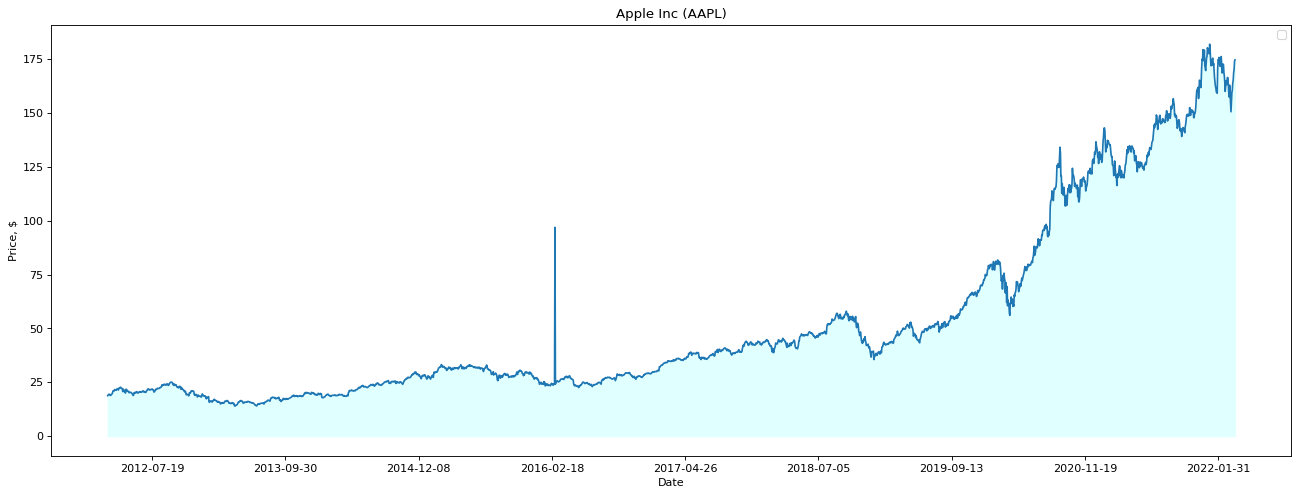

In [6]:
fig = plt.figure(figsize=(20,7), dpi=80)
plt.plot(df['Date'].values, df['Price'].values)
plt.fill_between(df['Date'].values, df['Price'].values, color = 'lightcyan')  
plt.title('Apple Inc (AAPL)')
plt.xlabel('Date')
plt.xticks(np.arange(100,df.shape[0],300))
plt.ylabel('Price, $')
plt.legend()
plt.show()

#  Preprocessing

In [7]:
df['Price'] = df['Price'].astype(float)

In [8]:
num_shape = 1900
window = 60

In [9]:
# num_shape = round(df.shape[0]*0.8)

train = df.iloc[:num_shape, 1:2].values
test = df.iloc[num_shape:, 1:2].values
df_price = np.vstack((train, test))

In [10]:
print(train.shape)
print(test.shape)

(1900, 1)
(639, 1)


In [11]:
sc = MinMaxScaler(feature_range=(0, 1))

In [12]:
# Previous prices, price on next day, window
X_train, Y_train = [], []
train_scaled = sc.fit_transform(train)

for i in range(train.shape[0]-window):
  batch = np.reshape(train_scaled[i:i+window, 0], (window, 1))
  X_train.append(batch)
  Y_train.append(train_scaled[i+window, 0])

X_train = np.stack(X_train)
Y_train = np.stack(Y_train)  

In [15]:
X_test = []
test_scaled = sc.fit_transform(df_price[num_shape-window:])

for i in range(test.shape[0]):
  batch = np.reshape(test_scaled[i:i+window, 0], (window, 1))
  X_test.append(batch)
X_test = np.stack(X_test)  

In [17]:
print(X_train.shape)
print(X_test.shape)

(1840, 60, 1)
(639, 60, 1)
